<a href="https://colab.research.google.com/github/gmehra123/course1/blob/master/Regression_stats_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

### Introduction
* Statstical tool to analyze the relationship between 2 variables.
* Regression models allow for exploration of relationship between a response variable and an explanatory variable.
* Can predict response variables given explanatory variables
* *Linear regression* is used when the reponse variable is continous
* *Logistic Regression* is used when the response variable is yes or no.
* *Statsmodels* is a library more optimized for insights
* *scikit-learn* is a library more optimized for prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tai=pd.read_csv('https://assets.datacamp.com/production/repositories/5857/datasets/4c29a50214b5b3232b2b99eee35cdde2f588dfac/taiwan_real_estate2.csv')

In [3]:
tai.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


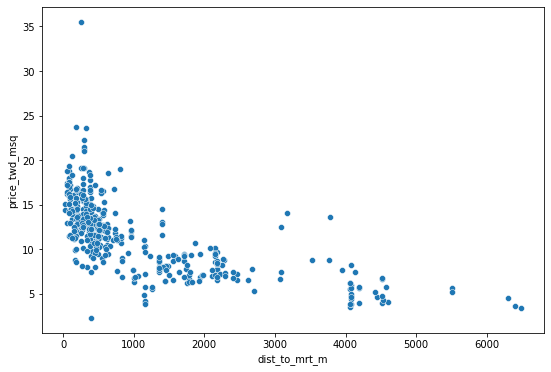

In [4]:
# understanding relation ship between price and dist to mrt
fig,ax=plt.subplots()
sns.scatterplot(x='dist_to_mrt_m',y='price_twd_msq',data=tai)
fig.set_size_inches([9,6])

### Fitting a regression
* Linear Regression defined by 2 parameters, the slope and the intercept
* Slope is constant for a line (change in y)/(change in x)


In [5]:
from statsmodels.formula.api import ols
model=ols('dist_to_mrt_m~price_twd_msq',data=tai)
model1=model.fit()
model1.params

Intercept        3456.999528
price_twd_msq    -206.506091
dtype: float64

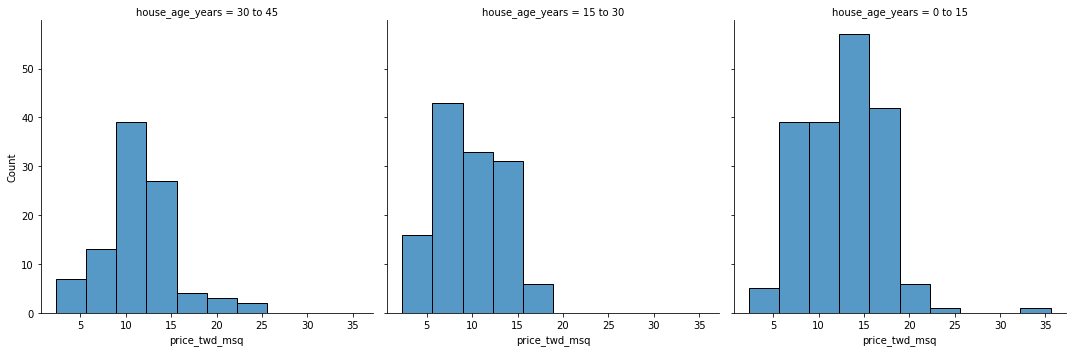

In [6]:
# Visualize the relationship between house age years and price
sns.displot(data=tai,x='price_twd_msq',col='house_age_years',bins=10)

In [7]:
# Fitting a model with categorical variable
model=ols('price_twd_msq~house_age_years+0',data=tai).fit()
model.params

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64

In [8]:
model=ols('price_twd_msq~dist_to_mrt_m',data=tai).fit()
model.params

Intercept        13.873352
dist_to_mrt_m    -0.002197
dtype: float64

In [9]:
tai['predictions']=model.fittedvalues

In [10]:
tai['resid']=model.resid

In [11]:
tai.sample(5)

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,predictions,resid
206,379.5575,10,15 to 30,13.313162,13.039353,0.273809
85,338.9679,9,0 to 15,15.370651,13.128540,2.242111
26,383.8624,5,0 to 15,17.004539,13.029894,3.974645
165,1236.5640,1,0 to 15,9.258699,11.156259,-1.897560
398,1717.1930,2,0 to 15,6.959153,10.100176,-3.141024


In [14]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     342.2
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           4.64e-56
Time:                        20:33:32   Log-Likelihood:                -1047.6
No. Observations:                 414   AIC:                             2099.
Df Residuals:                     412   BIC:                             2107.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.8734      0.197     70.258

### Regression to the mean
* Response_actual=fitted_value/prediction + residual
* This is equivalent to saying what can be expalained and what cannot be expalined.
* Extreme examples are due to radomness or noise
* Extreme examples do ot persist over time. This is the key intuition behind *Regression to the mean*.
### Transformations
* Sometimes the relationships between the data are not linear. In that case you might need to square or cube the explanatory variable before fitting the data.
* If the data is right skewed, lots of low values with few high outliers a sqrt transformation on both the explanatory and the response varibale could work and is commonly used. In this case prediction requires an extra step of squaring the prediction results


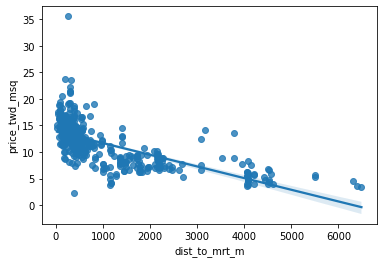

In [12]:
sns.regplot(data=tai,x='dist_to_mrt_m',y='price_twd_msq')

> The dist_to_mrt variable seem to be right skewed with a few outliers, houses that are very far from the MRT station. In this case it might be benefecial to transform the variable with a sqrt transformation

In [13]:
import numpy as np
tai['dist_sq']=np.sqrt(tai.dist_to_mrt_m)

In [15]:
model2=ols('price_twd_msq~dist_sq',data=tai).fit()


In [16]:
tai['predictions_sq']=model2.fittedvalues
tai['resid_sq']=model2.resid

In [17]:
tai.sample(5)

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,predictions,resid,dist_sq,predictions_sq,resid_sq
234,2216.6120,4,0 to 15,7.231467,9.002807,-1.771339,47.080909,8.101391,-0.869923
105,292.9978,6,0 to 15,21.482602,13.229550,8.253052,17.117179,13.580045,7.902557
82,150.9347,7,0 to 15,14.553707,13.541704,1.012003,12.285548,14.463474,0.090232
289,289.3248,5,0 to 15,13.464448,13.237620,0.226827,17.009550,13.599724,-0.135276
144,1360.1390,1,0 to 15,8.593041,10.884728,-2.291688,36.880062,9.966543,-1.373502


In [18]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     469.7
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           4.55e-70
Time:                        16:56:55   Log-Likelihood:                -1015.3
No. Observations:                 414   AIC:                             2035.
Df Residuals:                     412   BIC:                             2043.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.7098      0.278     60.163      0.0

> In this case looks like the predictions after taking the sqrt are better, both by looking at the sample and the adjusted R squared in the model summary 0.53 vs 0.45

In [19]:
# Checking model fitsuainf RMSE. Lower values are better
print("Untransformed Model error",np.sqrt(model.mse_resid))
print("Transformed Model error",np.sqrt(model2.mse_resid))

Untransformed Model error 3.046456710939631
Transformed Model error 2.8175939245390764


> If the model is a good fit then the residuals are approximately normally distributed with mean 0. You can plot the residuals vs the fitted values. The trend line should be close to 0. Another way is a Q-Q plot.
X axis has theortical quantiles from a normal dist while on the y axis you have quantiles from your data. They should be equal and follow the y=x line for a perfect fit

-1.0984235528658553e-15

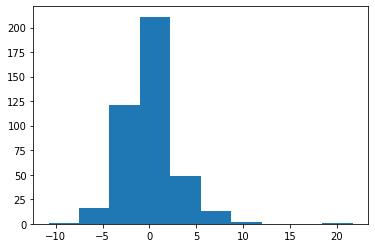

In [20]:
# Check fit method 1-Histogram of residuals
fig,ax=plt.subplots()
ax.hist(model2.resid)
model2.resid.mean()

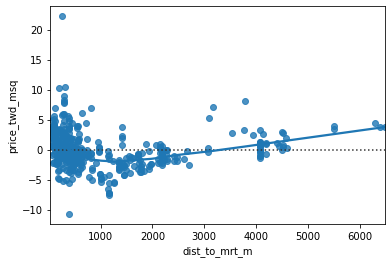

In [21]:
# Mehod 2-: resid plot
sns.residplot(x='dist_to_mrt_m',y='price_twd_msq',data=tai,lowess=True)

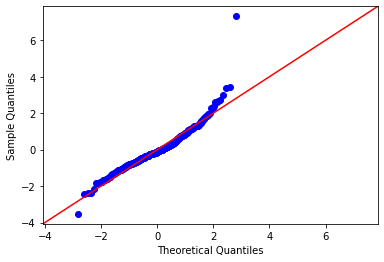

In [33]:
#method 3-: Q-Q plot
from statsmodels.api import qqplot
qqplot(data=model.resid,fit=True,line='45')
plt.show()

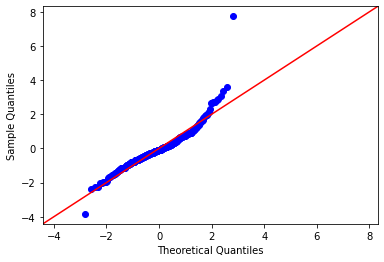

In [36]:
qqplot(data=model2.resid,fit=True,line='45')
plt.show()

### Outliers,Leverage and influence
* Outliers are highly unusual data points, too large or too small.
* **Leverage** is a measure of how extreme your explanatory variable values are.
* **Influence** is a measure of if you a leave the value out how much your model would change.


In [22]:
summary=model2.get_influence().summary_frame()
tai['leverage_2']=summary['hat_diag']
tai['influence']=summary['cooks_d']

In [23]:
tai.sort_values(by='influence',ascending=False)

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,predictions,resid,dist_sq,predictions_sq,resid_sq,leverage_2,influence
270,252.5822,1,0 to 15,35.552194,13.318355,22.233839,15.892835,13.803908,21.748286,0.003849,1.155487e-01
148,3780.5900,0,15 to 30,13.645991,5.566290,8.079701,61.486503,5.467431,8.178560,0.012147,5.244008e-02
228,3171.3290,0,0 to 15,14.099849,6.905014,7.194834,56.314554,6.413085,7.686764,0.009332,3.538436e-02
220,186.5101,9,30 to 45,23.691377,13.463534,10.227842,13.656870,14.212738,9.478639,0.004401,2.512289e-02
113,393.2606,6,0 to 15,2.299546,13.009243,-10.709697,19.830799,13.083879,-10.784333,0.003095,2.281295e-02
...,...,...,...,...,...,...,...,...,...,...,...
298,4082.0150,0,15 to 30,5.052950,4.903971,0.148979,63.890649,5.027850,0.025100,0.013619,5.554280e-07
6,623.4731,7,30 to 45,12.193646,12.503399,-0.309753,24.969443,12.144315,0.049331,0.002530,3.896928e-07
265,815.9314,4,15 to 30,11.527988,12.080512,-0.552524,28.564513,11.486982,0.041006,0.002415,2.570474e-07
237,732.8528,0,0 to 15,11.800303,12.263060,-0.462757,27.071254,11.760013,0.040289,0.002435,2.501281e-07


In [24]:
tai

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,predictions,resid,dist_sq,predictions_sq,resid_sq,leverage_2,influence
0,84.87882,10,30 to 45,11.467474,13.686848,-2.219374,9.212970,15.025273,-3.557800,0.005764,4.648246e-03
1,306.59470,9,15 to 30,12.768533,13.199673,-0.431141,17.509846,13.508249,-0.739716,0.003506,1.216711e-04
2,561.98450,5,0 to 15,14.311649,12.638507,1.673142,23.706212,12.375287,1.936362,0.002625,6.231096e-04
3,561.98450,5,0 to 15,16.580938,12.638507,3.942431,23.706212,12.375287,4.205651,0.002625,2.939394e-03
4,390.56840,5,0 to 15,13.040847,13.015159,0.025689,19.762803,13.096311,-0.055464,0.003106,6.055123e-07
...,...,...,...,...,...,...,...,...,...,...,...
409,4082.01500,0,0 to 15,4.659607,4.903971,-0.244364,63.890649,5.027850,-0.368243,0.013619,1.195505e-04
410,90.45606,9,0 to 15,15.128593,13.674593,1.454000,9.510839,14.970810,0.157783,0.005661,8.977830e-06
411,390.96960,7,15 to 30,12.284418,13.014277,-0.729859,19.772951,13.094456,-0.810038,0.003104,1.290873e-04
412,104.81010,5,0 to 15,15.885023,13.643053,2.241970,10.237680,14.837912,1.047111,0.005418,3.782254e-04


### Multi variable regression

In [25]:
from statsmodels.formula.api import ols
tai=pd.read_csv('https://assets.datacamp.com/production/repositories/5857/datasets/4c29a50214b5b3232b2b99eee35cdde2f588dfac/taiwan_real_estate2.csv')

In [26]:
tai['dist_sqrt']=np.sqrt(tai.dist_to_mrt_m)

In [27]:
model3=ols('price_twd_msq~dist_sqrt+n_convenience+house_age_years',data=tai).fit()

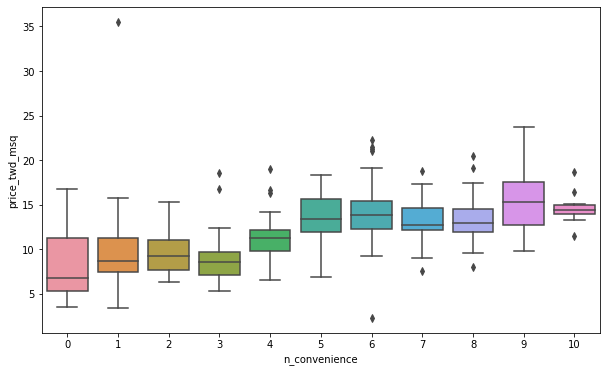

In [28]:
fig=plt.figure()
fig.set_size_inches([10,6])
sns.boxplot(x='n_convenience',y='price_twd_msq',data=tai)

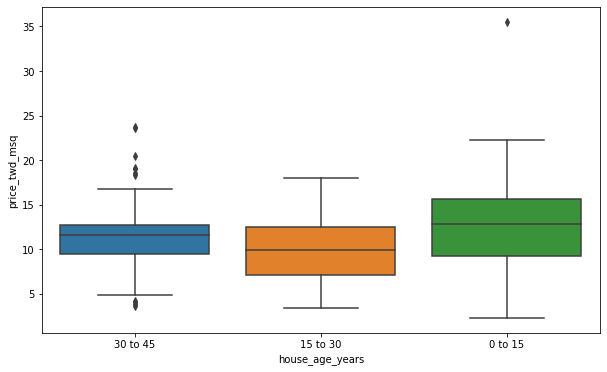

In [60]:
fig=plt.figure()
fig.set_size_inches([10,6])
sns.boxplot(x='house_age_years',y='price_twd_msq',data=tai)

In [29]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     140.7
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           1.68e-75
Time:                        16:57:16   Log-Likelihood:                -993.67
No. Observations:                 414   AIC:                             1997.
Df Residuals:                     409   BIC:                             2017.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [30]:
np.sqrt(model3.mse_resid)/tai.price_twd_msq.mean()

0.2335613656790428

In [31]:
tai['predictions']=model3.fittedvalues

In [32]:
tai['resid']=model3.resid

In [33]:
tai.sample(5)

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,dist_sqrt,predictions,resid
115,737.9161,2,15 to 30,14.039334,27.164611,10.622268,3.417067
405,130.9945,6,15 to 30,11.255673,11.445283,13.980988,-2.725315
75,1360.1390,1,0 to 15,8.925870,36.880062,10.270133,-1.344263
162,4066.5870,0,15 to 30,3.509834,63.769797,4.685649,-1.175816
31,769.4034,7,15 to 30,7.564297,27.738122,11.825658,-4.261361


### Logistic Regression
* if the response variable is categorical (0,1) then we use logistic regression.
* The model predictions given by the equation can be thought of as probabilities. If you just use a standard ols model it will give you probabilities greater than 1 or less than 0. Therefore a special type of model object has to be used called a logistic model which uses an s shaped curve

In [34]:
churn=pd.read_csv('https://assets.datacamp.com/production/repositories/5857/datasets/848e6bf5245f30e7e5cf0f7cb4bab7636a407c6f/churn.csv')

In [35]:
churn.sample(5)

,has_churned,time_since_first_purchase,time_since_last_purchase
104,0,0.383570,-0.812909
349,1,-0.835804,-0.066184
238,1,0.033377,1.527104
40,0,0.575321,-0.858290
251,1,-0.679162,-0.793931


In [36]:
churn.columns=['churned','ts_first','ts_last']

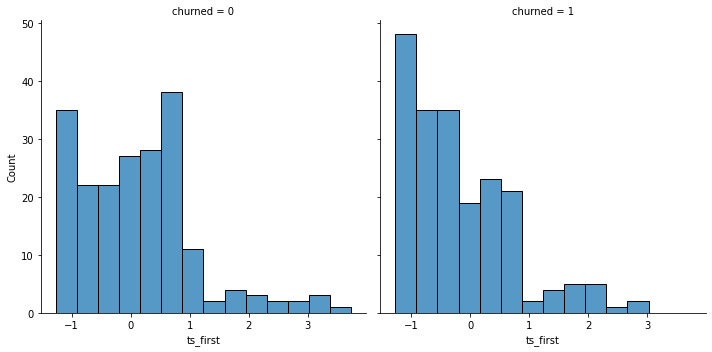

churned
0    0.120485
1   -0.189225
Name: ts_first, dtype: float64

In [42]:
sns.displot(data=churn,x='ts_first',col='churned')
plt.show()
churn.groupby('churned')['ts_first'].mean()

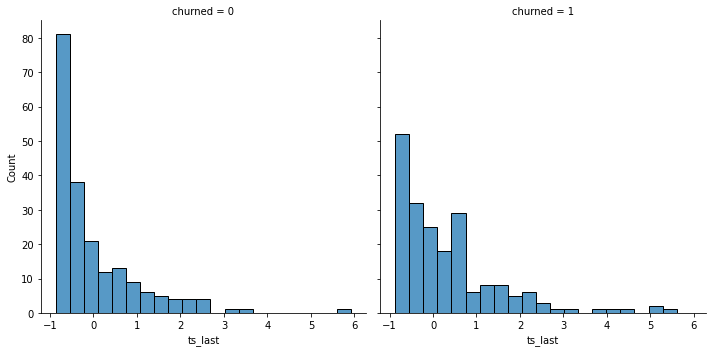

churned
0   -0.010299
1    0.299398
Name: ts_last, dtype: float64

In [43]:
sns.displot(data=churn,x='ts_last',col='churned')
plt.show()
churn.groupby('churned')['ts_last'].mean()

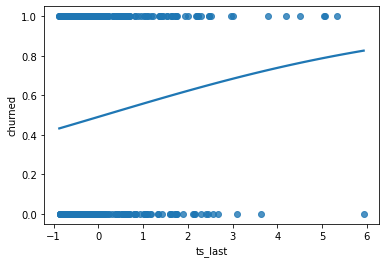

In [44]:
# Visualizing a logistic relationship
sns.regplot(data=churn,x='ts_last',y='churned',logistic=True,ci=None)

### Predictions for Logistic regression
* You can create predictions on explnatory data in a way that is similar to linear regression
* Odds ratio-: p/(1-p)
* Confusion matrix used to assess the performance of logistic regression models

In [46]:
from statsmodels.formula.api import logit

In [50]:
# Running a logit and getting fitted values and result
model=logit('churned~ts_first',data=churn).fit()

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4


In [52]:
model.params

Intercept   -0.015185
ts_first    -0.354795
dtype: float64

In [56]:
churn['predi_prob']=model.predict(churn)

In [60]:
churn['prediction']=np.round(churn.predi_prob)

In [63]:
churn.sample(5)

,churned,ts_first,ts_last,predi_prob,prediction
73,0,0.710807,0.036955,0.433552,0.0
318,1,0.414179,2.225147,0.459555,0.0
286,1,-1.023504,-0.410255,0.586120,1.0
241,1,0.587925,1.028737,0.444288,0.0
86,0,3.177013,-0.718021,0.241885,0.0


In [65]:
outcomes=pd.DataFrame({'actual':churn.churned,'prediction':churn.prediction})

In [69]:
outcomes.value_counts(sort=False).unstack()

prediction,0.0,1.0
actual,,
0,112,88
1,76,124


In [71]:
conf_mat=model.pred_table()

In [77]:
accuracy=(conf_mat[0,0]+conf_mat[1,1])/conf_mat.sum()
print('Accuracy is: ',accuracy)

Accuracy is:  0.59


In [78]:
TN=conf_mat[0,0]
TP=conf_mat[1,1]
FN=conf_mat[1,0]
FP=conf_mat[0,1]